<a href="https://colab.research.google.com/github/Mikeygoldman1/Group12_MBTI/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of MBTI Personality Using Random Forest Classifier 

In [1]:
import pandas as pd
import numpy as np
import re
import os
import string
import nltk
from random import sample
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import neural_network
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import warnings
from collections import Counter


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/mbti_1.csv")

## Preprocessing 

In [ ]:
import re
import nltk
!pip install contractions
import contractions
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
def preprocess_1(text):
    # Lowering letters
    text = text.lower()

    # Removing emails & twitter usernames
    text = re.sub('\S*@\S*', '', text)

    # Expand contractions   
    text=contractions.fix(text)
        
    # Removing urls (S+ matches all non whitespace chars)
    text = re.sub(r'http\S*', '', text)
        
    # Removing numbers
    text = re.sub('[^a-zA-Z]',' ',text)

    # Remove MBTI type mentions from posts 
    # text = re.sub(r"(intj)|(intp)|(infp)|(infj)|(istj)|(istp)|(isfp)|(isfj)|(entj)|(entp)|(enfp)|(enfj)|(estj)|(estp)|(esfp)|(esfj')", ' ', text)

    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
def preprocess_2(text):
    # Removing all whitespaces in order to join with proper whitespace
    word_tokens = word_tokenize(text)
     

    # Removing all stop words
    english_stopwords = stopwords.words('english')  
    word_tokens = [word for word in word_tokens if not word in english_stopwords] 
    
    
    # Lemmatize the text 
    lemmatizer = WordNetLemmatizer()
    word_tokens = [lemmatizer.lemmatize(word) for word in word_tokens ]

    return ' '.join(word_tokens)
    

In [ ]:
dataset['posts'] = dataset['posts'].apply(preprocess_1)
dataset['posts'] = dataset['posts'].apply(preprocess_2)

## Splitting Data into Train and Test sets for each Dichotomy 

In [ ]:
from sklearn.model_selection import train_test_split
Train_X,Test_X,Train_Y,Test_Y=model_selection.train_test_split(dataset['posts'],dataset['type'],random_state=42,test_size=0.1)


In [ ]:
IE_Train_Y=Train_Y.apply(lambda x: 1 if x[0]=='I' else 0)
NS_Train_Y=Train_Y.apply(lambda x: 1 if x[1]=='N' else 0)
TF_Train_Y=Train_Y.apply(lambda x: 1 if x[2]=='T' else 0)
JP_Train_Y=Train_Y.apply(lambda x: 1 if x[3]=='J' else 0)

IE_Test_Y=Test_Y.apply(lambda x: 1 if x[0]=='I' else 0)
NS_Test_Y=Test_Y.apply(lambda x: 1 if x[1]=='N' else 0)
TF_Test_Y=Test_Y.apply(lambda x: 1 if x[2]=='T' else 0)
JP_Test_Y=Test_Y.apply(lambda x: 1 if x[3]=='J' else 0)


## Feature Extraction using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
Tfidf_vect = TfidfVectorizer(lowercase=False, tokenizer=word_tokenize,max_features=1500)

#IE
IE_Train_X_Tfidf=Tfidf_vect.fit_transform(Train_X)
IE_Test_X_Tfidf=Tfidf_vect.transform(Test_X)
#NS
NS_Train_X_Tfidf=Tfidf_vect.fit_transform(Train_X)
NS_Test_X_Tfidf=Tfidf_vect.transform(Test_X)
#TF
TF_Train_X_Tfidf=Tfidf_vect.fit_transform(Train_X)
TF_Test_X_Tfidf=Tfidf_vect.transform(Test_X)
# # #JP
JP_Train_X_Tfidf=Tfidf_vect.fit_transform(Train_X)
JP_Test_X_Tfidf=Tfidf_vect.transform(Test_X)

## Sampling to deal with imbalanced data 

In [ ]:
!pip install imblearn

In [ ]:

# import imblearn
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(random_state=42)

# # On Train Dataset 
# IE_Train_X_Tfidf,IE_Train_Y = rus.fit_resample(IE_Train_X_Tfidf,IE_Train_Y)
# NS_Train_X_Tfidf,NS_Train_Y = rus.fit_resample(NS_Train_X_Tfidf,NS_Train_Y)
# TF_Train_X_Tfidf,TF_Train_Y = rus.fit_resample(TF_Train_X_Tfidf,TF_Train_Y)
# JP_Train_X_Tfidf,JP_Train_Y = rus.fit_resample(JP_Train_X_Tfidf,JP_Train_Y)

# print('Resample IE training dataset shape', Counter(IE_Train_Y ))
# print('Resample NS training dataset shape', Counter(NS_Train_Y ))
# print('Resample TF training dataset shape', Counter(TF_Train_Y ))
# print('Resample JP training dataset shape', Counter(JP_Train_Y ))

# # On Test Dataset
# IE_Test_X_Tfidf,IE_Test_Y = rus.fit_resample(IE_Test_X_Tfidf,IE_Test_Y)
# NS_Test_X_Tfidf,NS_Test_Y = rus.fit_resample(NS_Test_X_Tfidf,NS_Test_Y)
# TF_Test_X_Tfidf,TF_Test_Y = rus.fit_resample(TF_Test_X_Tfidf,TF_Test_Y)
# JP_Test_X_Tfidf,JP_Test_Y = rus.fit_resample(JP_Test_X_Tfidf,JP_Test_Y)


# print('Resample IE test dataset shape', Counter(IE_Test_Y ))
# print('Resample NS test dataset shape', Counter(NS_Test_Y ))
# print('Resample TF test dataset shape', Counter(TF_Test_Y ))
# print('Resample JP test dataset shape', Counter(JP_Test_Y ))


# import imblearn
# from imblearn.over_sampling import SMOTE 

# rus =  SMOTE(random_state=42)

# # On Train Dataset 
# IE_Train_X_Tfidf,IE_Train_Y = rus.fit_resample(IE_Train_X_Tfidf,IE_Train_Y)
# NS_Train_X_Tfidf,NS_Train_Y = rus.fit_resample(NS_Train_X_Tfidf,NS_Train_Y)
# TF_Train_X_Tfidf,TF_Train_Y = rus.fit_resample(TF_Train_X_Tfidf,TF_Train_Y)
# JP_Train_X_Tfidf,JP_Train_Y = rus.fit_resample(JP_Train_X_Tfidf,JP_Train_Y)

# print('Resample IE training dataset shape', Counter(IE_Train_Y ))
# print('Resample NS training dataset shape', Counter(NS_Train_Y ))
# print('Resample TF training dataset shape', Counter(TF_Train_Y ))
# print('Resample JP training dataset shape', Counter(JP_Train_Y ))

# # On Test Dataset
# IE_Test_X_Tfidf,IE_Test_Y = rus.fit_resample(IE_Test_X_Tfidf,IE_Test_Y)
# NS_Test_X_Tfidf,NS_Test_Y = rus.fit_resample(NS_Test_X_Tfidf,NS_Test_Y)
# TF_Test_X_Tfidf,TF_Test_Y = rus.fit_resample(TF_Test_X_Tfidf,TF_Test_Y)
# JP_Test_X_Tfidf,JP_Test_Y = rus.fit_resample(JP_Test_X_Tfidf,JP_Test_Y)


# print('Resample IE test dataset shape', Counter(IE_Test_Y ))
# print('Resample NS test dataset shape', Counter(NS_Test_Y ))
# print('Resample TF test dataset shape', Counter(TF_Test_Y ))
# print('Resample JP test dataset shape', Counter(JP_Test_Y ))


## Hyperparamter Tuning using Grid Search and Cross Validation

In [ ]:
# import imblearn
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import GridSearchCV
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline 
# import numpy as np


# parameters = {
#     "max_depth": np.arange(1, 70, 20),
#     "n_estimators": np.arange(1,5000,300)
# }

# grid_search_IE = GridSearchCV(RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=42), parameters, n_jobs=-1, verbose=1)
# grid_search_NS = GridSearchCV(RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=42), parameters, n_jobs=-1, verbose=1)
# grid_search_TF = GridSearchCV(RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=42), parameters, n_jobs=-1, verbose=1)
# grid_search_JP = GridSearchCV(RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=42), parameters, n_jobs=-1, verbose=1)


### Results of the GridSearchCV for I/E dichotomy:
- max_depth=21
- n_estimators=3601
- Best score=0.671

In [ ]:
# grid_search_IE.fit(IE_Train_X_Tfidf,IE_Train_Y)
# print("Best score for I/E dichotomy: %0.3f" % grid_search_IE.best_score_)
# print( grid_search_IE.best_params_)


### Results of the GridSearchCV for N/S dichotomy:
- max_depth=21
- n_estimators=2401
- Best score=0.675

In [ ]:
# grid_search_NS.fit(NS_Train_X_Tfidf,NS_Train_Y)
# print("Best score for N/S dichotomy: %0.3f" % grid_search_NS.best_score_)
# print( grid_search_NS.best_params_)


### Results of the GridSearchCV for T/F dichotomy:
- max_depth=61
- n_estimators=4201
- Best score=0.762

In [ ]:
# grid_search_TF.fit(TF_Train_X_Tfidf,TF_Train_Y)
# print("Best score for T/F dichotomy: %0.3f" % grid_search_TF.best_score_)
# print( grid_search_TF.best_params_)

### Results of the GridSearchCV for J/P dichotomy:
- max_depth=61
- n_estimators=4501
- Best score= 0.638

In [ ]:
# grid_search_JP.fit(JP_Train_X_Tfidf,JP_Train_Y)
# print("Best score for J/P dichotomy: %0.3f" % grid_search_JP.best_score_)
# print( grid_search_JP.best_params_)


### Validation Graphs for each Dichotomy

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold 
# from sklearn.ensemble import RandomForestClassifier
# parameters = {
#     "n_estimators":[3301],
#     "max_depth": np.arange(1, 70, 20)

# }
# grid = GridSearchCV(RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=42),parameters , cv=5, n_jobs=-1,return_train_score=True)
# grid.fit(IE_Train_X_Tfidf,IE_Train_Y)
# results_IE1 = pd.DataFrame(grid.cv_results_)

In [ ]:
# parameters = {
#     "n_estimators": np.arange(1,5000,300),
#     "max_depth":[61]

# }
# grid = GridSearchCV(RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=42),parameters , cv=5, n_jobs=-1,return_train_score=True)
# grid.fit(IE_Train_X_Tfidf,IE_Train_Y)
# results_IE2 = pd.DataFrame(grid.cv_results_)

In [ ]:
# plt.figure(figsize=(10,6))
# plt.plot(results_IE1['param_max_depth'],results_IE1['mean_test_score'],color='red',markerfacecolor='red', markersize=10,label='mean_validation_score')
# plt.plot(results_IE1['param_max_depth'],results_IE1['mean_train_score'],color='blue',markerfacecolor='red', markersize=10,label='mean_train_score')
# plt.title('Score vs Max Depth for I/E dichtomoty',size=15)
# plt.xlabel('Max Depth',size=15)
# plt.ylabel('Score',size=15)
# plt.legend()
# plt.show()
# plt.figure(figsize=(10,6))
# plt.plot(results_IE2['param_n_estimators'],results_IE2['mean_test_score'],color='red',markerfacecolor='red', markersize=10,label='mean_validation_score')
# plt.plot(results_IE2['param_n_estimators'],results_IE2['mean_train_score'],color='blue',markerfacecolor='red', markersize=10,label='mean_train_score')
# plt.title('Score vs Number of Trees for I/E dichtomoty',size=15)
# plt.xlabel('Number of Trees',size=15)
# plt.ylabel('Score',size=15)
# plt.legend()
# plt.show()

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold 
# from sklearn.ensemble import RandomForestClassifier
# parameters = {
#     "max_depth": np.arange(1, 70, 20),

# }
# grid = GridSearchCV(RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=42),parameters , cv=5, n_jobs=-1,return_train_score=True)
# grid.fit(NS_Train_X_Tfidf,NS_Train_Y)
# results_NS1 = pd.DataFrame(grid.cv_results_)

In [ ]:
# parameters = {
#     "n_estimators": np.arange(1,5000,300)

# }
# grid = GridSearchCV(RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=42),parameters , cv=5, n_jobs=-1,return_train_score=True)
# grid.fit(NS_Train_X_Tfidf,NS_Train_Y)
# results_NS2 = pd.DataFrame(grid.cv_results_)

In [ ]:
# plt.figure(figsize=(10,6))
# plt.plot(results_NS1['param_max_depth'],results_NS1['mean_test_score'],color='red',markerfacecolor='red', markersize=10,label='mean_validation_score')
# plt.plot(results_NS1['param_max_depth'],results_NS1['mean_train_score'],color='blue',markerfacecolor='red', markersize=10,label='mean_train_score')
# plt.title('Score vs Max Depth for N/S dichtomoty',size=15)
# plt.xlabel('Max Depth',size=15)
# plt.ylabel('Score',size=15)
# plt.legend()
# plt.show()
# plt.figure(figsize=(10,6))
# plt.plot(results_NS2['param_n_estimators'],results_NS2['mean_test_score'],color='red',markerfacecolor='red', markersize=10,label='mean_validation_score')
# plt.plot(results_NS2['param_n_estimators'],results_NS2['mean_train_score'],color='blue',markerfacecolor='red', markersize=10,label='mean_train_score')
# plt.title('Score vs Number of Trees for N/S dichtomoty',size=15)
# plt.xlabel('Number of Trees',size=15)
# plt.ylabel('Score',size=15)
# plt.legend()
# plt.show()

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold 
# from sklearn.ensemble import RandomForestClassifier
# parameters = {
#     "max_depth": np.arange(1, 70, 20),

# }
# grid = GridSearchCV(RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=42),parameters , cv=5, n_jobs=-1,return_train_score=True)
# grid.fit(TF_Train_X_Tfidf,TF_Train_Y)
# results_TF1 = pd.DataFrame(grid.cv_results_)

In [ ]:
# parameters = {
#     "n_estimators": np.arange(1,5000,300)

# }
# grid = GridSearchCV(RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=42),parameters , cv=5, n_jobs=-1,return_train_score=True)
# grid.fit(TF_Train_X_Tfidf,TF_Train_Y)
# results_TF2 = pd.DataFrame(grid.cv_results_)

In [ ]:
# plt.figure(figsize=(10,6))
# plt.plot(results_TF1['param_max_depth'],results_TF1['mean_test_score'],color='red',markerfacecolor='red', markersize=10,label='mean_validation_score')
# plt.plot(results_TF1['param_max_depth'],results_TF1['mean_train_score'],color='blue',markerfacecolor='red', markersize=10,label='mean_train_score')
# plt.title('Score vs Max Depth for T/F dichtomoty',size=15)
# plt.xlabel('Max Depth',size=15)
# plt.ylabel('Score',size=15)
# plt.legend()
# plt.show()
# plt.figure(figsize=(10,6))
# plt.plot(results_TF2['param_n_estimators'],results_TF2['mean_test_score'],color='red',markerfacecolor='red', markersize=10,label='mean_validation_score')
# plt.plot(results_TF2['param_n_estimators'],results_TF2['mean_train_score'],color='blue',markerfacecolor='red', markersize=10,label='mean_train_score')
# plt.title('Score vs Number of Trees for T/F dichtomoty',size=15)
# plt.xlabel('Number of Trees',size=15)
# plt.ylabel('Score',size=15)
# plt.legend()
# plt.show()

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold 
# from sklearn.ensemble import RandomForestClassifier
# parameters = {
#     "max_depth": np.arange(1, 70, 20),

# }
# grid = GridSearchCV(RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=42),parameters , cv=5, n_jobs=-1,return_train_score=True)
# grid.fit(JP_Train_X_Tfidf,JP_Train_Y)
# results_JP1 = pd.DataFrame(grid.cv_results_)

In [ ]:
# parameters = {
#     "n_estimators": np.arange(1,5000,300)

# }
# grid = GridSearchCV(RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=42),parameters , cv=5, n_jobs=-1,return_train_score=True)
# grid.fit(JP_Train_X_Tfidf,JP_Train_Y)
# results_JP2 = pd.DataFrame(grid.cv_results_)

In [ ]:
# plt.figure(figsize=(10,6))
# plt.plot(results_JP1['param_max_depth'],results_JP1['mean_test_score'],color='red',markerfacecolor='red', markersize=10,label='mean_validation_score')
# plt.plot(results_JP1['param_max_depth'],results_JP1['mean_train_score'],color='blue',markerfacecolor='red', markersize=10,label='mean_train_score')
# plt.title('Score vs Max Depth for J/P dichtomoty',size=15)
# plt.xlabel('Max Depth',size=15)
# plt.ylabel('Score',size=15)
# plt.legend()
# plt.show()
# plt.figure(figsize=(10,6))
# plt.plot(results_JP2['param_n_estimators'],results_JP2['mean_test_score'],color='red',markerfacecolor='red', markersize=10,label='mean_validation_score')
# plt.plot(results_JP2['param_n_estimators'],results_JP2['mean_train_score'],color='blue',markerfacecolor='red', markersize=10,label='mean_train_score')
# plt.title('Score vs Number of Trees for J/P dichtomoty',size=15)
# plt.xlabel('Number of Trees',size=15)
# plt.ylabel('Score',size=15)
# plt.legend()
# plt.show()

## Results of Tuned Models on the Unseen Test Set 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
tuned_IE=RandomForestClassifier(max_depth=21, n_estimators=3601,oob_score=True,n_jobs=-1,random_state=42)
tuned_IE.fit(IE_Train_X_Tfidf, IE_Train_Y) 
IE_predictions=tuned_IE.predict(IE_Test_X_Tfidf)
print(classification_report(IE_Test_Y, IE_predictions))
print(balanced_accuracy_score(IE_Test_Y, IE_predictions))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
tuned_NS=RandomForestClassifier(max_depth=21, n_estimators=2401,oob_score=True,n_jobs=-1,random_state=42)
tuned_NS.fit(NS_Train_X_Tfidf, NS_Train_Y) 
NS_predictions=tuned_NS.predict(NS_Test_X_Tfidf)
print(classification_report(NS_Test_Y, NS_predictions))
print(balanced_accuracy_score(NS_Test_Y, NS_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.86      1.00      0.93       747

    accuracy                           0.86       868
   macro avg       0.43      0.50      0.46       868
weighted avg       0.74      0.86      0.80       868

0.5


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
tuned_TF=RandomForestClassifier(max_depth=61, n_estimators=4201,oob_score=True,n_jobs=-1,random_state=42)
tuned_TF.fit(TF_Train_X_Tfidf, TF_Train_Y) 
TF_predictions=tuned_TF.predict(TF_Test_X_Tfidf)
print(classification_report(TF_Test_Y, TF_predictions))
print(balanced_accuracy_score(TF_Test_Y, TF_predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       465
           1       0.84      0.79      0.81       403

    accuracy                           0.83       868
   macro avg       0.83      0.83      0.83       868
weighted avg       0.83      0.83      0.83       868

0.8300248138957816


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
tuned_JP=RandomForestClassifier(max_depth=61, n_estimators=4501,oob_score=True,n_jobs=-1,random_state=42)
tuned_JP.fit(JP_Train_X_Tfidf, JP_Train_Y) 
JP_predictions=tuned_JP.predict(JP_Test_X_Tfidf)
print(classification_report(JP_Test_Y, JP_predictions))
print(balanced_accuracy_score(JP_Test_Y, JP_predictions))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84       536
           1       0.92      0.42      0.58       332

    accuracy                           0.76       868
   macro avg       0.82      0.70      0.71       868
weighted avg       0.80      0.76      0.74       868

0.7002225319187196


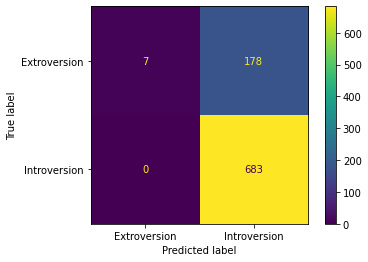

In [ ]:
from sklearn.metrics import confusion_matrix 
IE_confusion = confusion_matrix(IE_Test_Y, IE_predictions)
IE_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = IE_confusion, display_labels = ['Extroversion', 'Introversion'])
IE_cm_display.plot()
plt.show()


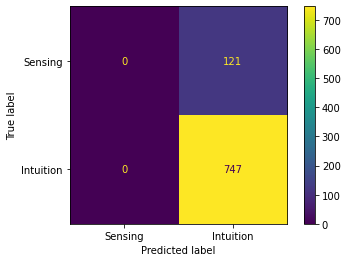

In [ ]:
from sklearn.metrics import confusion_matrix 
NS_confusion = confusion_matrix(NS_Test_Y, NS_predictions)
NS_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = NS_confusion, display_labels = ['Sensing', 'Intuition'])
NS_cm_display.plot()
plt.show()

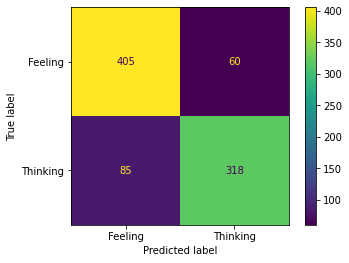

In [ ]:
from sklearn.metrics import confusion_matrix 
TF_confusion = confusion_matrix(TF_Test_Y, TF_predictions)
TF_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = TF_confusion, display_labels = ['Feeling', 'Thinking'])
TF_cm_display.plot()
plt.show()


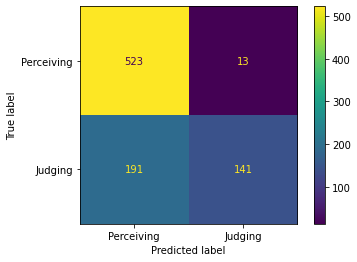

In [ ]:
from sklearn.metrics import confusion_matrix 
JP_confusion = confusion_matrix(JP_Test_Y, JP_predictions)
JP_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = JP_confusion, display_labels = ['Perceiving', 'Judging'])
JP_cm_display.plot()
plt.show()